In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [3]:
# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable (house price in 100,000s)

# Display first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
# Split into features and target
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model performance
print(f"Model Training Score: {model.score(X_train_scaled, y_train):.2f}")
print(f"Model Testing Score: {model.score(X_test_scaled, y_test):.2f}")


Model Training Score: 0.61
Model Testing Score: 0.58


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")  # How well the model explains the variance


Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R² Score: 0.58


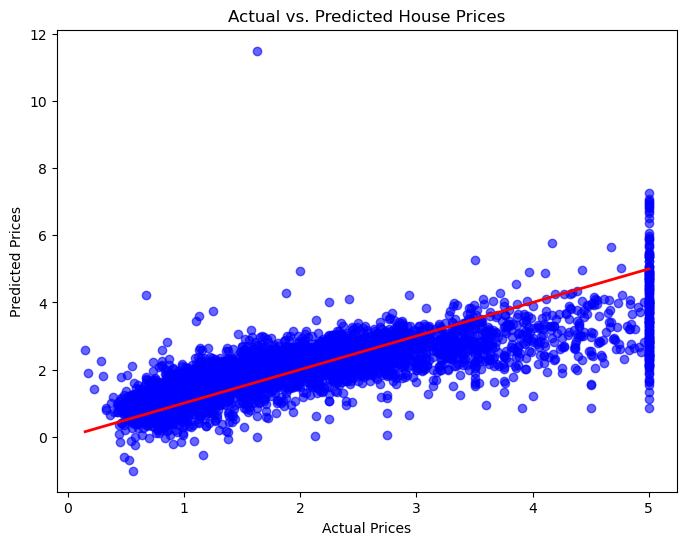

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Line of perfect fit
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


In [8]:
!pip install flask flask-cors scikit-learn pandas numpy joblib streamlit



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  

# Split data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler Saved Successfully!")


✅ Model and Scaler Saved Successfully!


In [10]:
%%writefile app.py
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")

app = Flask(__name__)
CORS(app)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        input_data = np.array([[
            data['MedInc'], data['HouseAge'], data['AveRooms'], 
            data['AveBedrms'], data['Population'], data['AveOccup'], 
            data['Latitude'], data['Longitude']
        ]])

        # Scale input
        input_scaled = scaler.transform(input_data)

        # Make prediction
        predicted_price = model.predict(input_scaled)[0] * 100000  

        return jsonify({"price": f"${predicted_price:,.2f}"})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(port=5000)


Overwriting app.py


In [11]:
#!python app.py

In [12]:
%%writefile frontend.py
import streamlit as st
import requests

st.set_page_config(page_title="House Price Prediction", page_icon="🏠", layout="centered")

st.title("🏠 House Price Prediction App")

st.write("Enter house details below to predict the price.")

# Form inputs
MedInc = st.number_input("Median Income (e.g., 3.5 - 15.0)", min_value=0.5, max_value=15.0, value=5.0)
HouseAge = st.number_input("House Age (years, e.g., 5 - 50)", min_value=1, max_value=100, value=20)
AveRooms = st.number_input("Average Rooms per house (e.g., 2 - 10)", min_value=1.0, max_value=15.0, value=5.0)
AveBedrms = st.number_input("Average Bedrooms per house (e.g., 1 - 5)", min_value=0.5, max_value=5.0, value=2.0)
Population = st.number_input("Population in area (e.g., 500 - 40000)", min_value=100, max_value=50000, value=3000)
AveOccup = st.number_input("Average Occupancy per house (e.g., 1 - 6)", min_value=0.5, max_value=10.0, value=3.0)
Latitude = st.number_input("Latitude (e.g., 32.5 - 42.0)", min_value=30.0, max_value=45.0, value=37.0)
Longitude = st.number_input("Longitude (e.g., -124.3 to -114.3)", min_value=-125.0, max_value=-110.0, value=-120.0)

# Button
if st.button("Predict House Price"):
    # Send request to backend
    url = "http://127.0.0.1:5000/predict"
    data = {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "AveRooms": AveRooms,
        "AveBedrms": AveBedrms,
        "Population": Population,
        "AveOccup": AveOccup,
        "Latitude": Latitude,
        "Longitude": Longitude
    }
    response = requests.post(url, json=data)

    if response.status_code == 200:
        result = response.json()
        if "price" in result:
            st.success(f"🏡 Predicted House Price: {result['price']}")
        else:
            st.error("Error in prediction!")
    else:
        st.error("Failed to connect to the backend.")


Overwriting frontend.py


In [ ]:
!streamlit run frontend.py
